In [1]:
import numpy as np
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme();
%matplotlib inline
import colour

In [2]:
tonemapper = cv2.createTonemap(2.2)

In [2]:
interp_patches_parent_path = Path(f'interpolated-patches')
interp_patches_paths = sorted(interp_patches_parent_path.glob('**/*.exr'))

In [3]:
patches_parent_path = Path(f'patches')
patches_paths = sorted(patches_parent_path.glob('**/*.bmp'))

In [71]:
S000_000 = cv2.imread(f'{interp_patches_paths[0]}', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

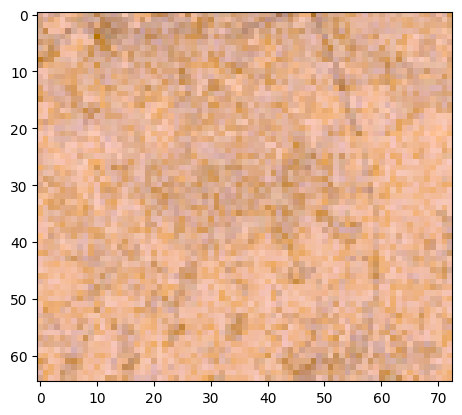

In [74]:
img_tonemapped = tonemapper.process(S000_000)
plt.imshow(cv2.cvtColor(img_tonemapped, cv2.COLOR_BGR2RGB))

In [3]:
output_data = Path(f'output-data/')
mel_paths = sorted(output_data.glob('**/out-mel/*.txt'))
hg_paths = sorted(output_data.glob('**/out-hem/*.txt'))

In [5]:
idx = 4832
mel = np.loadtxt(mel_paths[idx], delimiter=',')
hg = np.loadtxt(hg_paths[idx], delimiter=',')
patch = cv2.imread(str(patches_paths[idx]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

In [6]:
hg_paths[idx]

PosixPath('output-data/S013/out-hem/114.txt')

In [7]:
mel.shape

(70, 78)

In [8]:
mel.max()

0.44236799999999998

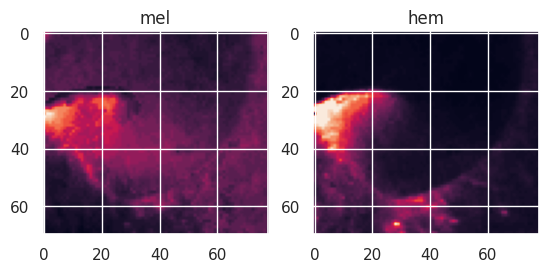

In [9]:
fig, axs = plt.subplots(1,2)
axs[0].set_title('mel')
axs[1].set_title('hem')
im = axs[0].imshow(mel)
im = axs[1].imshow(hg)


In [10]:
melN = cv2.normalize(mel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)
hgN = cv2.normalize(hg, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

melC = cv2.applyColorMap(melN, cv2.COLORMAP_VIRIDIS)
hgC = cv2.applyColorMap(hgN, cv2.COLORMAP_VIRIDIS)


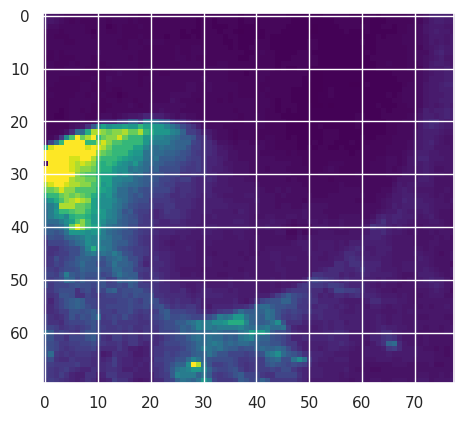

In [11]:
plt.imshow(cv2.cvtColor(hgC, cv2.COLOR_BGR2RGB))

In [12]:
cv2.imwrite('_data/results/mel_4832.png', melC, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [141]:

cv2.imwrite('_data/results/patch_4762.png', orig_patch, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [13]:
cv2.imwrite('_data/results/hem_4832.png', hgC, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [5]:
patches_paths[4888]

PosixPath('patches/S013/170.bmp')

In [56]:
orig_patch = cv2.resize(cv2.imread(str(patches_paths[4832]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), (64,64), interpolation=cv2.INTER_CUBIC)
interp_patch = cv2.imread('../pix2pix/results/pix2pix-mantiuk/test_latest/images/4832_real.png', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
gan_patch = cv2.imread('../pix2pix/results/pix2pix-mantiuk/test_latest/images/4832_fake.png', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

In [57]:
orig_patch_lab = cv2.cvtColor(orig_patch, cv2.COLOR_BGR2Lab)
interp_patch_lab = cv2.cvtColor(interp_patch, cv2.COLOR_BGR2Lab)
gan_patch_lab = cv2.cvtColor(gan_patch, cv2.COLOR_BGR2Lab)


In [58]:
interp_patch_lab

array([[[140, 138, 136],
        [142, 138, 129],
        [146, 139, 139],
        ..., 
        [146, 138, 136],
        [147, 137, 134],
        [144, 140, 154]],

       [[140, 137, 146],
        [142, 138, 137],
        [150, 138, 154],
        ..., 
        [145, 138, 149],
        [148, 135, 142],
        [148, 138, 148]],

       [[143, 135, 143],
        [147, 139, 142],
        [152, 138, 146],
        ..., 
        [147, 137, 140],
        [146, 138, 144],
        [147, 136, 146]],

       ..., 
       [[164, 140, 145],
        [164, 140, 147],
        [162, 140, 148],
        ..., 
        [149, 137, 137],
        [149, 138, 146],
        [148, 138, 146]],

       [[163, 140, 139],
        [165, 141, 154],
        [164, 140, 145],
        ..., 
        [147, 140, 140],
        [147, 136, 147],
        [151, 139, 154]],

       [[163, 139, 144],
        [164, 140, 149],
        [165, 141, 139],
        ..., 
        [153, 138, 139],
        [149, 139, 149],
        [151, 139,

In [149]:
diff = cv2.add(orig_patch_lab,-gan_patch_lab)

diff_L = diff[:,:,0]
diff_A = diff[:,:,1]
diff_B = diff[:,:,2]

delta_e = np.mean( np.sqrt(diff_L*diff_L + diff_A*diff_A + diff_B*diff_B) )

print(delta_e)



1.84863


In [59]:
delta_E = colour.delta_E(orig_patch_lab, gan_patch_lab, method="CIE 2000")
delta_E.mean()

4.4213467370157176

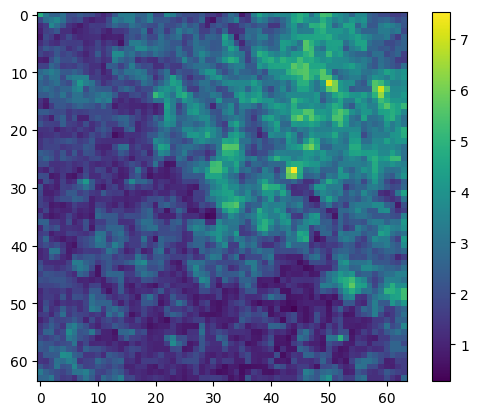

In [151]:
plt.imshow(delta_E)
plt.colorbar()

In [45]:
print(delta_E[delta_E != 0])

[ 30.51507135]


In [148]:
orig_patches = np.zeros((363,64,64,3))
interp_patches = np.zeros((363,64,64,3))
gan_patches = np.zeros((363,64,64,3))

In [149]:
gan_patches.shape

(363, 64, 64, 3)

In [16]:
s13_paths = sorted(Path('pix2pix-data/A/test/').glob('**/*.png'))


In [17]:
s13_paths[0].stem

'4718'

In [20]:
for m, path in enumerate(s13_paths):
    i = int(path.stem)
    orig_patches[m,:,:,:] = cv2.cvtColor(cv2.imread(f'pix2pix-data/B/test/{i}.png', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), cv2.COLOR_BGR2Lab)
    interp_patches[m,:,:,:] = cv2.cvtColor(cv2.imread(f'../pix2pix/results/pix2pix-mantiuk/test_latest/images/{i}_real.png', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), cv2.COLOR_BGR2Lab)
    gan_patches[m,:,:,:] = cv2.cvtColor(cv2.imread(f'../pix2pix/results/pix2pix-mantiuk/test_latest/images/{i}_fake.png', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), cv2.COLOR_BGR2Lab)

In [30]:
delta_E_s13 = colour.delta_E(orig_patches, interp_patches, method="CIE 2000")
delta_E_s13.mean()

9.3132060560224321

In [193]:
for k in range(361):
    dE[k] = colour.delta_E(orig_patches[k], interp_patches[k], method="CIE 2000").mean()

In [197]:
dE.mean()

10.38143335253365

Reconstruct face S021

In [3]:
results_path = Path('../pix2pix/results/pr4m-v2/test_latest/images/')

In [4]:
gan_paths = sorted(results_path.glob('**/*fake.png'))
interp_paths = sorted(Path('interpolated-patches-per-point/S021').glob('**/*.exr'))
render_paths = sorted(results_path.glob('**/*real.png'))
patches_paths = sorted(Path('linear_patches/S021').glob('**/*.bmp'))
nonlinear_patches_paths = sorted(Path('patches/S021').glob('**/*.bmp'))

In [5]:
len(interp_paths)

363

In [13]:
def get_face_size(subj_id):
    assert subj_id >= 0
    assert subj_id <= 22
    
    img = np.array(Image.open(f"../prbx/Skin_code/data/ICT_3DRFE_mod/S{subj_id:03d}//shader/S{subj_id:03d}_E00_Mask.bmp"))

    col_forehead = [247,42,206]
    col_cheeks = [215,245,151]
    col_chin = [228,149,79]

    mask1 = np.all(img == col_forehead, axis=2)
    mask2 = np.all(img == col_cheeks, axis=2)
    mask3 = np.all(img == col_chin, axis=2)
    mask = mask1 | mask2 | mask3
    img[~mask, :] = [0,0,0]

    nz = np.nonzero(img)
    h = nz[0].max() - nz[0].min()
    w = nz[1].max() - nz[1].min()
    
    return h,w

In [14]:
h, w = (68, 65)

ih, iw = get_face_size(21)

height_px_per_cm = ih/19.0
width_px_per_cm = iw/14.0

In [5]:
output_data = Path(f'output-data/S021/')
mel_paths = sorted(output_data.glob('**/out-mel/*.txt'))
hg_paths = sorted(output_data.glob('**/out-hem/*.txt'))

In [9]:
mel_paths[300]

PosixPath('output-data/S021/out-mel/300.txt')

In [10]:
face = cv2.imread('/mnt/c/Users/Salman/Documents/Uni/Project/Skin_code/data/ICT_3DRFE_mod/S021/shader/diff_texture.bmp', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
face_gan = np.zeros_like(face, dtype=np.float32)
face_render = np.zeros_like(face)
face_interp = np.zeros_like(face,dtype=np.float32)
face_mel = np.zeros(face.shape[:-1])
face_hem = np.zeros(face.shape[:-1])
face_masked = np.zeros_like(face)
face_nonlinear = np.zeros_like(face)

mask = cv2.imread('/mnt/c/Users/Salman/Documents/Uni/Project/Skin_code/data/ICT_3DRFE_mod/S021/shader/S021_E00_Mask.bmp', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

In [11]:

height_step = int( 0.8 * height_px_per_cm) # 20% overlap to allow for a smoother transition to be more likely from the GAN
width_step = int(0.8 * width_px_per_cm)

count = 0

for i in range(0,face.shape[0]-height_step,height_step):
    for j in range(0,face.shape[1]-width_step,width_step):
        if np.all(mask[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] > 0):
            gan = cv2.resize(cv2.imread(str(gan_paths[count]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), (w,h), cv2.INTER_CUBIC)
            gan = gan / 255.0
            gan = colour.models.eotf_inverse_sRGB(gan)
            render = cv2.resize(cv2.imread(str(render_paths[count]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), (w,h), cv2.INTER_CUBIC)
            interp = cv2.imread(str(interp_paths[count]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
            
            patch = cv2.imread(str(patches_paths[count]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
            nonlinear_patch = cv2.imread(str(nonlinear_patches_paths[count]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
            mel = np.loadtxt(mel_paths[count], delimiter=',')
            hem = np.loadtxt(hg_paths[count], delimiter=',')

            face_gan[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = gan
            face_render[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = render
            face_interp[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = interp
            face_mel[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = mel
            face_hem[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = hem
            face_masked[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = patch
            face_nonlinear[i:i+int(height_px_per_cm),j:j+int(width_px_per_cm)] = nonlinear_patch

            count += 1

In [12]:
tonemapper = cv2.createTonemap(gamma=1.2)

In [13]:
# face_interp = tonemapper.process(face_interp)
# face_interp = np.nan_to_num(face_interp)
face_interp = colour.models.eotf_inverse_sRGB(face_interp)

In [98]:
np.clip(face_interp*255,0,255).astype(np.uint8).max()

254

In [217]:
face_interp.max()

0.99999997379879113

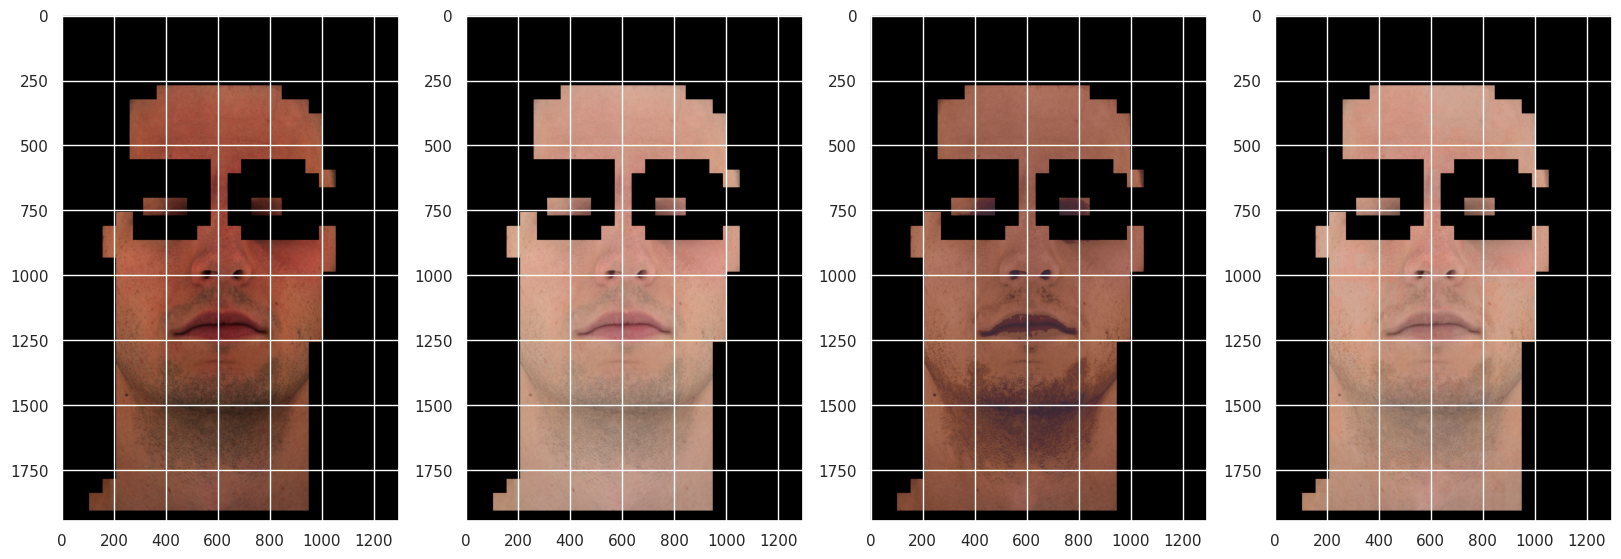

In [14]:
fig, axs = plt.subplots(1,4, figsize=(20,40))
axs[0].imshow(cv2.cvtColor(face_masked, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(face_nonlinear, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(np.clip(face_interp*255,0,255).astype(np.uint8), cv2.COLOR_BGR2RGB))
axs[3].imshow(cv2.cvtColor(np.clip(face_gan*255,0,255).astype(np.uint8), cv2.COLOR_BGR2RGB))
# axs[4].imshow(cv2.cvtColor(face_render, cv2.COLOR_BGR2RGB))
# axs[4].imshow(face_hem)

In [144]:
cv2.imwrite('_data/results/face_masked.png', face_nonlinear, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [249]:
cv2.imwrite('_data/results/face_interp.png', np.clip(face_interp*255,0,255).astype(np.uint8), [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [147]:
cv2.imwrite('_data/results/face_gan.png', np.clip(face_gan*255,0,255).astype(np.uint8), [cv2.IMWRITE_PNG_COMPRESSION, 0])


True

In [61]:
rows, cols = face_nonlinear.shape[:2]

In [21]:
_fi = cv2.cvtColor((face_interp*255).astype(np.uint8),cv2.COLOR_BGR2Lab)
_fnl = cv2.cvtColor(face_nonlinear,cv2.COLOR_BGR2Lab)

In [25]:
face_gan.max()

0.87827158

In [26]:
_fg = cv2.cvtColor((face_gan*255).astype(np.uint8),cv2.COLOR_BGR2Lab)

In [24]:
delta_E_s021 = colour.delta_E(_fnl, _fi, method="CIE 2000")
delta_E_s021.mean()

10.823982382429989

In [28]:
delta_E_s021 = colour.delta_E(_fnl, _fg, method="CIE 2000")
delta_E_s021.mean()

0.65278360801386626

In [6]:
output_data = Path(f'output-data/')
mel_paths = sorted(output_data.glob('**/S021/out-mel/*.txt'))
hg_paths = sorted(output_data.glob('**/S021/out-hem/*.txt'))
epth_paths = sorted(output_data.glob('**/S021/out-epth/*.txt'))

In [7]:
patch_idx = 149

In [8]:
mel = np.loadtxt(mel_paths[patch_idx], delimiter=',')
hg = np.loadtxt(hg_paths[patch_idx], delimiter=',')
epth = np.loadtxt(epth_paths[patch_idx], delimiter=',')

In [9]:
melN = cv2.normalize(mel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)
hgN = cv2.normalize(hg, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)
epthN = cv2.normalize(epth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

melC = cv2.applyColorMap(melN, cv2.COLORMAP_VIRIDIS)
hgC = cv2.applyColorMap(hgN, cv2.COLORMAP_VIRIDIS)
epthC = cv2.applyColorMap(epthN, cv2.COLORMAP_VIRIDIS)

In [10]:
cv2.imwrite(f'_data/results/mel_{patch_idx}.png', melC, [cv2.IMWRITE_PNG_COMPRESSION, 0])
cv2.imwrite(f'_data/results/hg_{patch_idx}.png', hgC, [cv2.IMWRITE_PNG_COMPRESSION, 0])
cv2.imwrite(f'_data/results/epth_{patch_idx}.png', epthC, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [11]:
patch = cv2.imread(str(nonlinear_patches_paths[patch_idx]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
cv2.imwrite(f'_data/results/patch_{patch_idx}.png', patch, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [15]:
gan_patch = cv2.resize(cv2.imread(str(gan_paths[patch_idx]), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), (w,h), cv2.INTER_CUBIC)
gan_patch = colour.models.eotf_inverse_sRGB(gan_patch / 255.0)
cv2.imwrite(f'_data/results/gan_{patch_idx}.png', (gan_patch * 255).astype(np.uint8), [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [16]:
patch.max()

224

In [17]:
normal_patch = cv2.imread(f'normal_patches/S021/{patch_idx:03d}.bmp', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
cv2.imwrite(f'_data/results/normal_{patch_idx}.png', normal_patch, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [18]:
_gan = cv2.cvtColor((gan_patch * 255).astype(np.uint8),cv2.COLOR_BGR2Lab)
_patch = cv2.cvtColor(patch,cv2.COLOR_BGR2Lab)

delta_E_s021 = colour.delta_E(_patch, _gan, method="CIE 2000")
delta_E_s021.mean()

0.80558722083194578